<h1 style="font-family:'Poppins', Arial, sans-serif; font-weight:700; color:#1e8449; text-align:center; margin-bottom:20px; letter-spacing:1px; font-size:40px;">👨‍💻 Author: <span style="color:#0cd865;">Ali Hassan</span></h1>

<div style="text-align:center; margin-top:20px; line-height:3; font-size:18px;">
  <span style="margin-right:8px;"></span><a href="https://github.com/Ali-Shahzadd"><img src="https://img.shields.io/badge/GitHub-Profile-181717?style=flat-square&logo=github&logoColor=white" alt="GitHub" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.kaggle.com/alihassanshahzad786"><img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=flat-square&logo=kaggle&logoColor=white" alt="Kaggle" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.linkedin.com/in/ali-hassan-3952a2290/"><img src="https://img.shields.io/badge/LinkedIn-Profile-0077B5?style=flat-square&logo=linkedin&logoColor=white" alt="LinkedIn" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://x.com/alishahzadddd?s=21"><img src="https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=flat-square&logo=twitter&logoColor=white" alt="Twitter" style="height:30px;"></a>
</div>




<h1 style="
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-size: 2.5rem;
    font-weight: 700;
    color: #304c84ff;
    margin-top: 20px;
    letter-spacing: 1px;
">
    📊 Customer Churn Prediction
</h1>





<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSAoNYV0AosCQ1X418yumqdXgWDYlLTvMjZUg&s" alt="Plant" style="width:320px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;">| <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWDDihllUSnHO5o1R0T2TqBkrp1Se8fi9TKg&s" alt="Plant" style="width:320px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> 
---------|----------


### Author: `Ali Hassan`

**[Customer Churn Dataset](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-testing-master.csv)**\
About Dataset\
Customer churn refers to the phenomenon where customers discontinue their relationship or subscription with a company or service provider. It represents the rate at which customers stop using a company's products or services within a specific period. Churn is an important metric for businesses as it directly impacts revenue, growth, and customer retention.

In the context of the Churn dataset, the churn label indicates whether a customer has churned or not. A churned customer is one who has decided to discontinue their subscription or usage of the company's services. On the other hand, a non-churned customer is one who continues to remain engaged and retains their relationship with the company.

Understanding customer churn is crucial for businesses to identify patterns, factors, and indicators that contribute to customer attrition. By analyzing churn behavior and its associated features, companies can develop strategies to retain existing customers, improve customer satisfaction, and reduce customer turnover. Predictive modeling techniques can also be applied to forecast and proactively address potential churn, enabling companies to take proactive measures to retain at-risk customers.

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Import Libraries</h3>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime


from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
roc_curve, confusion_matrix, classification_report, precision_recall_curve)
from sklearn.inspection import permutation_importance
import joblib
import re
import os

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Loading the Data</h3>

In [15]:
df=pd.read_csv('customer_churn_dataset-testing-master.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [16]:
df.shape

(64374, 12)

In [17]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">EDA</h3>

In [18]:
# Checking the Missing Values

df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


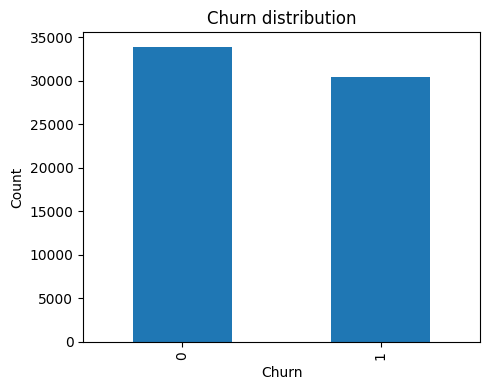

In [20]:
# Plot churn distribution
plt.figure(figsize=(5,4))
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [21]:
# Changing columns name to smaller
df.columns=df.columns.str.replace(' ','_').str.lower()
df.columns

Index(['customerid', 'age', 'gender', 'tenure', 'usage_frequency',
       'support_calls', 'payment_delay', 'subscription_type',
       'contract_length', 'total_spend', 'last_interaction', 'churn'],
      dtype='object')

In [ ]:
# Checking the Object column
df.select_dtypes(include='object').columns

Index(['gender', 'subscription_type', 'contract_length'], dtype='object')

In [23]:
print(df['gender'].unique())
print("------------------------")
print(df['subscription_type'].unique())
print("------------------------")
print(df['contract_length'].unique())
print("------------------------")

['Female' 'Male']
------------------------
['Basic' 'Standard' 'Premium']
------------------------
['Monthly' 'Annual' 'Quarterly']
------------------------


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Encoding</h3>

In [ ]:
# Using Label Encoder on Gender       
# Female ------------------->  0
# Male ------------------->  1

le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

In [30]:
# Using one hot encoder on rest

# Select columns
cols_to_encode = ['subscription_type', 'contract_length']

# Initialize and fit
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = ohe.fit_transform(df[cols_to_encode])

# Get new column names
encoded_cols = ohe.get_feature_names_out(cols_to_encode)

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

# Drop original columns & concat encoded ones
df = df.drop(columns=cols_to_encode)
df = pd.concat([df, encoded_df], axis=1)

In [35]:
df.head()

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,churn,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,1,22,0,25,14,4,27,598,9,1,1.0,0.0,0.0,0.0,1.0,0.0
1,2,41,0,28,28,7,13,584,20,0,0.0,0.0,1.0,0.0,1.0,0.0
2,3,47,1,27,10,2,29,757,21,0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,35,1,9,12,5,17,232,18,0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,53,0,58,24,9,2,533,18,0,0.0,0.0,1.0,1.0,0.0,0.0


In [54]:
df.columns

Index(['customerid', 'age', 'gender', 'tenure', 'usage_frequency',
       'support_calls', 'payment_delay', 'total_spend', 'last_interaction',
       'churn', 'subscription_type_Basic', 'subscription_type_Premium',
       'subscription_type_Standard', 'contract_length_Annual',
       'contract_length_Monthly', 'contract_length_Quarterly'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  64374 non-null  int64  
 1   age                         64374 non-null  int64  
 2   gender                      64374 non-null  int64  
 3   tenure                      64374 non-null  int64  
 4   usage_frequency             64374 non-null  int64  
 5   support_calls               64374 non-null  int64  
 6   payment_delay               64374 non-null  int64  
 7   total_spend                 64374 non-null  int64  
 8   last_interaction            64374 non-null  int64  
 9   churn                       64374 non-null  int64  
 10  subscription_type_Basic     64374 non-null  float64
 11  subscription_type_Premium   64374 non-null  float64
 12  subscription_type_Standard  64374 non-null  float64
 13  contract_length_Annual      643

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Train/Test Split</h3>

In [34]:
# Split the Data

X=df.drop(df[['churn','customerid']],axis=1)
Y=df['churn']

In [38]:
print(X.shape,Y.shape)

(64374, 14) (64374,)


In [39]:
# Training

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(51499, 14) (51499,)
(12875, 14) (12875,)


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Training with diffrent Model</h3>

In [ ]:
# Defining the Models
models = {
    'logreg': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE, solver='saga'),
    'rf': RandomForestClassifier(n_jobs=-1, random_state=RANDOM_STATE),
    'gb': GradientBoostingClassifier(random_state=RANDOM_STATE),
    'hgb': HistGradientBoostingClassifier(random_state=RANDOM_STATE)
}

In [ ]:
# Cross-validate and compare
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
cv_results = {}

for name, model in models.items():
    print(f"Training {name}...")
    scores = cross_val_score(model, X_train, Y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
    cv_results[name] = np.mean(scores)
    print(f"{name} Mean ROC AUC: {np.mean(scores):.4f}")

best_model_name = max(cv_results, key=cv_results.get)
print(f"\nBest model: {best_model_name}")

Training logreg...
logreg Mean ROC AUC: 0.8934
Training rf...
rf Mean ROC AUC: 1.0000
Training gb...
gb Mean ROC AUC: 0.9999
Training hgb...
hgb Mean ROC AUC: 1.0000

Best model: hgb


In [ ]:
# Train best model on full training data
best_model = models[best_model_name]
best_model.fit(X_train, Y_train)

,loss,'log_loss'
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,None
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


In [46]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Model Evaluation</h3>

In [47]:
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

print(f"Test ROC AUC: {roc_auc_score(Y_test, y_proba):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875

Test ROC AUC: 1.0000


<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Plotting HeatMap</h3>

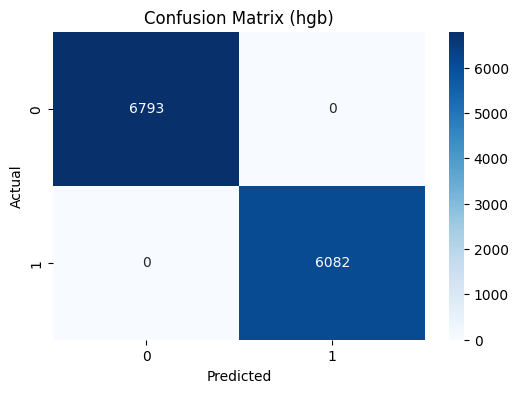

In [48]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix ({best_model_name})")
plt.show()

<h3 style="color: brown;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Saving the Model</h3>

In [51]:
# Save the trained model
joblib.dump(best_model, "best_churn_model.joblib")
print(" Model  saved.")

 Model  saved.


In [52]:
# Making a Predictive System

import pandas as pd
import joblib

def predict_churn(new_data):
    # Load model
    model = joblib.load("best_churn_model.joblib")
    
    # Convert input to DataFrame (must have same columns as training X)
    new_df = pd.DataFrame([new_data])
    
    # Predict
    pred = model.predict(new_df)[0]
    proba = model.predict_proba(new_df)[0][1]
    
    return pred, proba


In [56]:
new_customer = {
    'age': 22,
    'gender': 0,  
    'tenure': 25,
    'usage_frequency': 14,
    'support_calls': 4,
    'payment_delay': 27,
    'total_spend': 598,
    'last_interaction': 9,
    'subscription_type_Basic': 1,
    'subscription_type_Premium': 0,
    'subscription_type_Standard': 0,
    'contract_length_Annual': 0,
    'contract_length_Monthly': 1,
    'contract_length_Quarterly': 0
}

pred, proba = predict_churn(new_customer)

print(f"Predicted Churn: {'Yes' if pred==1 else 'No'}")
print(f"Churn Probability: {proba:.2%}")


Predicted Churn: Yes
Churn Probability: 99.75%
